In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
DEVICE = "mps" if torch.backends.mps.is_available() else "cpu"
print(DEVICE)

mps


In [10]:
# transform = transforms.ToTensor()
# train_DS = datasets.MNIST(root = '/Users/sanghyun/Desktop/GIT_Folder', train=True, download=True, transform=transform)
# test_DS = datasets.MNIST(root  = '/Users/sanghyun/Desktop/GIT_Folder', train=False, download=True, transform=transform)

100.0%
100.0%
100.0%
100.0%


## Train_DS와 test_DS 구경

In [3]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/Users/sanghyun/Desktop/GIT_Folder', train=True, download=False, transform=transform) # transform -> tensor로 바꿔주는...!
test_DS = datasets.MNIST(root  = '/Users/sanghyun/Desktop/GIT_Folder', train=False, download=False, transform=transform)

In [4]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/sanghyun/Desktop/GIT_Folder
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /Users/sanghyun/Desktop/GIT_Folder
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [15]:
train_DS.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [16]:
train_DS.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [18]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [19]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

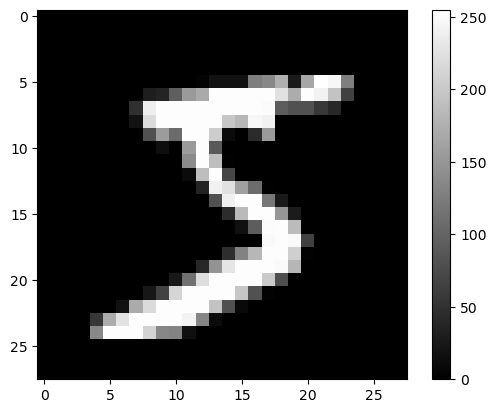

In [23]:
plt.imshow(train_DS.data[0], cmap="gray")
plt.colorbar()

In [24]:
print(train_DS.targets)
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


## DataLoader 구경

In [5]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [6]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한 국자 뜨자~

print(type(x_batch))
print(x_batch.shape)

<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])


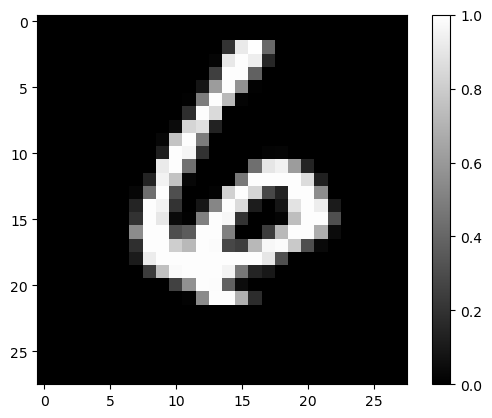

In [8]:
plt.imshow(x_batch[0].squeeze(), cmap="gray")
plt.colorbar()

In [10]:
print(train_DL.dataset.data.dtype)
print(x_batch.dtype)

'''
transform = transforms.ToTensor()에서 .ToTensor()의 역할
1. tensor로 바꿔준다
2. 가채행열로 바꿔준다
3. 0~1 사이로 바꿔준다
'''

torch.uint8
torch.float32


## 본격적으로 model 만들기!

In [20]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(28 * 28, 100),
                                    nn.ReLU(),
                                    nn.Linear(100, 10)) # 10개 분류니깐 10개의  출력층


    def forward(self, x):

        x = torch.flatten(x, start_dim=1)

        x = self.linear(x)

        return x

In [18]:
# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_image = torch.flatten(x_batch)
print(flat_image.shape)

flat_image = torch.flatten(x_batch, start_dim=1) # 개 체 행 렬이면 1번 즉 체부터 펴라... 32 \\ 1 * 28 * 28
print(flat_image.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [22]:
model = MLP()
print(model)

x_batch, _ = next(iter(train_DL))
# print(model(x_batch).shape) -> error -> torch.Size([32, 1, 28, 28]) 이므로 개채행열은데 nn linear은 개채를 원한다!! 즉 flatten을 하자!!
print(model(x_batch).shape) # 32 , 10 -> 10개의 확룰 32개의 데이터에서

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


## 모델 훈련시키기!

In [23]:
from torch import optim

LP = 1e-1

EPOCH = 100

criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr = LP)

def Train(model, train_DL, criterion, optimizer):

    loss_history = []

    NoT = len(train_DL.dataset)

    model.train()

    for ep in range(EPOCH):

        rloss = 0 # running loss

        for x_batch, y_batch in train_DL: # for SGD

            # inference
            y_hat = model(x_batch)

            # loss
            loss = criterion(y_hat, y_batch)

            # update
            optimizer.zero_grad() # gradient 누적을 막지 위한 초기화 -> 안하면 gradient가 계속 누적돼서 가중치 업데이트가 잘못된다.
            loss.backward() # backpropagation
            optimizer.step() # weight update

            # loss accumulation
            loss_b = loss.item() * x_batch.shape[0]
            '''
            loss.item()은 한 데이터당 평균 손실값
            전체 손실로 바꾸려면 배치 크기인 x_batch.shape[0]을 곱
            '''
            rloss += loss_b  # -> 이렇게 하는 이유 다시 곰곰히 생각해보기

        # print loss
        loss_e = rloss / NoT

        loss_history += [loss_e]

        print(f'Epoch : {ep + 1}, train loss : {round(loss_e, 3)}')
        print("-" * 20)

    return loss_history

Epoch : 1, train loss : 1.234
--------------------
Epoch : 2, train loss : 1.257
--------------------
Epoch : 3, train loss : 1.335
--------------------
Epoch : 4, train loss : 1.245
--------------------
Epoch : 5, train loss : 1.232
--------------------
Epoch : 6, train loss : 1.255
--------------------
Epoch : 7, train loss : 1.215
--------------------
Epoch : 8, train loss : 1.278
--------------------
Epoch : 9, train loss : 1.25
--------------------
Epoch : 10, train loss : 1.26
--------------------
Epoch : 11, train loss : 1.206
--------------------
Epoch : 12, train loss : 1.259
--------------------
Epoch : 13, train loss : 1.221
--------------------
Epoch : 14, train loss : 1.227
--------------------
Epoch : 15, train loss : 1.243
--------------------
Epoch : 16, train loss : 1.243
--------------------
Epoch : 17, train loss : 1.23
--------------------
Epoch : 18, train loss : 1.18
--------------------
Epoch : 19, train loss : 1.191
--------------------
Epoch : 20, train loss : 

In [ ]:
# 1 50